In [27]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import pickle
import csv
from sklearn.metrics import accuracy_score

In [28]:
# Import dataset

dataset1 = pd.read_csv("CSV/crossV_file.csv")
x =dataset1.iloc[:,:-1].values
y =dataset1.iloc[:,1].values
dataset1.head()

,temp,cnt
0,0.32,9
1,0.22,156
2,0.24,11
3,0.68,13
4,0.88,102


In [29]:
# check for num of rows and cols

print ('The train data has {0} rows and {1} columns'.format(dataset1.shape[0],dataset1.shape[1]))

The train data has 4519 rows and 2 columns


In [ ]:
#shape of x train and y train 

print("x train data shape",x.shape)
print("y train data shape",y.shape)

In [ ]:
# load pickle file

file = open('trainmodel.pkl', 'rb')
pickle_in = pickle.load(file)

In [30]:
# dump train model pickle file
file = open('trainmodel.pkl', 'rb')
pickle_in = pickle.load(file)

In [31]:
# predicting the test set result and train set result

y_pred_cv = pickle_in.predict(x)
print("pred_cv",y_pred_cv)

pred_cv [122.65598268  85.70856773  93.09805072 ... 211.32977856 203.94029557
 196.55081258]


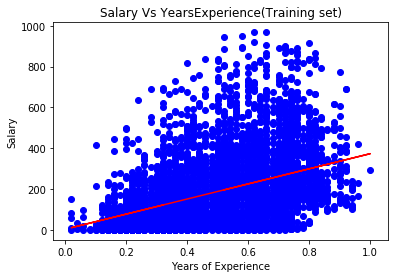

In [33]:
# visualising the training set results

plt.scatter(x, y , color = 'blue')
plt.plot(x,y_pred_cv, color = 'red')
plt.title("Salary Vs YearsExperience(Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [35]:
# Accuracy for train and test
# Accuracy = r2_score(y,y_pred_cv)*100
error = r2_score(y, y_pred_cv)      
acc_r2 = (1-error)*100
       
# using median_ab_error
median_ab_error = median_absolute_error(y, y_pred_cv)
print(acc_r2, median_ab_error)

83.752348571412 100.0454656710761


In [ ]:
class Simple_Linear_regression:
    
    # fitting sample linear regresion to the training set
    
    def model_train(self,x,y):  
        regressor = LinearRegression()
        regressor.fit(x,y)
        return regressor
    
    # dump train model pickle file
    
    def pickel_file(self,regressor):
        
       
        file = open('trainmodel.pkl', 'wb')
        pickle.dump(regressor,file)
        file.close()
    
    # predicting the test set result and train set result
    
    def prediction(self,x,regressor):
    
        y_pred_train = regressor.predict(x)
        return y_pred_train

    # Accuracy for train and test
    
    def accuracy(self,y,y_pred_train):
        
        # Accuracy = r2_score(y,y_pred_train)*100
        error = r2_score(y, y_pred_train)      
        acc_r2 = (1-error)*100
       
        # using median_ab_error
        median_ab_error = median_absolute_error(y, y_pred_train)
        return acc_r2, median_ab_error
        
    
    # visualising the training set results
    
    def plotting(self,x, y):
        
        plt.scatter(x, y , color = 'blue')
        plt.plot(x, regressor.predict(x), color = 'red')
        plt.title("Salary Vs YearsExperience(Training set)")
        plt.xlabel("Years of Experience")
        plt.ylabel("Salary")
        plt.show()
        
def main(dataset1,x,y):
    
    object_SimpleLR = Simple_Linear_regression()
    
    regressor = object_SimpleLR.model_train(x,y)
#     print("Regressor : ", regressor)
    
    object_SimpleLR.pickel_file(regressor)
    
    
    y_pred_train = object_SimpleLR.prediction(x,regressor)
#     print("prediction of y train data : ",y_pred_train)
    
    acc_r2, median_ab_error = object_SimpleLR.accuracy(y,y_pred_train)
    print("Accuracy train data acc_r2 : ", acc_r2)
    print("Accuracy train data median_ab_error : ",  median_ab_error)
    
    
#     object_SimpleLR.plotting(x,y)
    
    
    
    
    
main(dataset1,x,y)
    
